In [1]:
import pickle
import numpy as np

In [3]:
with open('train_qa.txt' , "rb") as fp:
    train_data = pickle.load(fp)
    

In [7]:
len(train_data)


10000

In [5]:
with open('test_qa.txt' , "rb") as fp:
    test_data = pickle.load(fp)

In [8]:
len(test_data)


1000

In [10]:
train_data[0][2]

'no'

In [11]:
vocab = set()

In [184]:
all_data = test_data + train_data

In [185]:
for story , question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [186]:
vocab.add('yes')
vocab.add('no')

In [206]:
len(vocab)

37

In [207]:
vocab_len = len(vocab) + 1

In [208]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [209]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [210]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [211]:
tokenizer = Tokenizer(filters = [])

In [212]:
tokenizer.fit_on_texts(vocab)

In [213]:
tokenizer.word_index

{'football': 1,
 'sandra': 2,
 'travelled': 3,
 'yes': 4,
 '?': 5,
 'up': 6,
 'bathroom': 7,
 'took': 8,
 'down': 9,
 'mary': 10,
 'to': 11,
 'the': 12,
 'john': 13,
 'got': 14,
 'is': 15,
 'went': 16,
 'apple': 17,
 'left': 18,
 'moved': 19,
 'no': 20,
 'garden': 21,
 'grabbed': 22,
 'dropped': 23,
 'milk': 24,
 'bedroom': 25,
 'picked': 26,
 'in': 27,
 'discarded': 28,
 'journeyed': 29,
 'daniel': 30,
 'kitchen': 31,
 'put': 32,
 'office': 33,
 '.': 34,
 'there': 35,
 'hallway': 36,
 'back': 37}

In [214]:
# train dataset
train_story_text = []
train_question_text = []
train_answers = []

for story , question , answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [215]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [216]:
train_story_seq

[[10, 19, 11, 12, 7, 34, 2, 29, 11, 12, 25, 34],
 [10,
  19,
  11,
  12,
  7,
  34,
  2,
  29,
  11,
  12,
  25,
  34,
  10,
  16,
  37,
  11,
  12,
  25,
  34,
  30,
  16,
  37,
  11,
  12,
  36,
  34],
 [10,
  19,
  11,
  12,
  7,
  34,
  2,
  29,
  11,
  12,
  25,
  34,
  10,
  16,
  37,
  11,
  12,
  25,
  34,
  30,
  16,
  37,
  11,
  12,
  36,
  34,
  2,
  16,
  11,
  12,
  31,
  34,
  30,
  16,
  37,
  11,
  12,
  7,
  34],
 [10,
  19,
  11,
  12,
  7,
  34,
  2,
  29,
  11,
  12,
  25,
  34,
  10,
  16,
  37,
  11,
  12,
  25,
  34,
  30,
  16,
  37,
  11,
  12,
  36,
  34,
  2,
  16,
  11,
  12,
  31,
  34,
  30,
  16,
  37,
  11,
  12,
  7,
  34,
  30,
  26,
  6,
  12,
  1,
  35,
  34,
  30,
  16,
  11,
  12,
  25,
  34],
 [10,
  19,
  11,
  12,
  7,
  34,
  2,
  29,
  11,
  12,
  25,
  34,
  10,
  16,
  37,
  11,
  12,
  25,
  34,
  30,
  16,
  37,
  11,
  12,
  36,
  34,
  2,
  16,
  11,
  12,
  31,
  34,
  30,
  16,
  37,
  11,
  12,
  7,
  34,
  30,
  26,
  6,
  12,
  1,


In [217]:
def vectorize_stories(data , word_index = tokenizer.word_index, max_story_len = max_story_len , max_ques_len = max_ques_len ):
    X = []
    Xq =[]
    Y =[]
    
    for story , query , answer in data :
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return(pad_sequences(X,maxlen=max_story_len),
           pad_sequences(Xq,maxlen=max_ques_len),
           np.array(Y) )

In [218]:
inputs_train , queries_train, answers_train = vectorize_stories(train_data)

In [219]:
inputs_test , queries_test , answers_test = vectorize_stories(test_data)

In [220]:
inputs_train

array([[ 0,  0,  0, ..., 12, 25, 34],
       [ 0,  0,  0, ..., 12, 36, 34],
       [ 0,  0,  0, ..., 12,  7, 34],
       ...,
       [ 0,  0,  0, ..., 12, 25, 34],
       [ 0,  0,  0, ..., 24, 35, 34],
       [ 0,  0,  0, ..., 17, 35, 34]])

In [221]:
queries_test

array([[15,  2, 27, 12, 36,  5],
       [15, 30, 27, 12,  7,  5],
       [15, 30, 27, 12, 33,  5],
       ...,
       [15,  2, 27, 12, 36,  5],
       [15, 10, 27, 12, 31,  5],
       [15, 10, 27, 12, 25,  5]])

In [222]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [223]:
tokenizer.word_index['yes']

4

In [224]:
tokenizer.word_index['no']

20

In [225]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input , Activation , Dense , Permute , Dropout , add, dot , concatenate , LSTM

In [226]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [227]:
#input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len , output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [228]:
#input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len , output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [229]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len , output_dim = 64 , input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

In [230]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [231]:
match = dot([input_encoded_m , question_encoded ] , axes = (2,2))
match = Activation('softmax')(match)

In [232]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [233]:
answer = concatenate([response,question_encoded])

In [234]:
answer = LSTM(32)(answer)

In [235]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [236]:
answer = Activation('softmax')(answer)

In [240]:
model = Model([input_sequence , question] , answer)
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [241]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 156)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 sequential_19 (Sequential)     (None, None, 64)     2432        ['input_11[0][0]']               
                                                                                                  
 sequential_21 (Sequential)     (None, 6, 64)        2432        ['input_12[0][0]']               
                                                                                            

In [242]:
history = model.fit([inputs_train , queries_train] , answers_train,
                   batch_size = 32, epochs = 20,
                   validation_data = ([inputs_test , queries_test],answers_test)
                   )

Epoch 1/20
313/313 [==============================] - 13s 26ms/step - loss: 0.9054 - accuracy: 0.4941 - val_loss: 0.6947 - val_accuracy: 0.4988
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 0.7067 - accuracy: 0.5022 - val_loss: 0.6938 - val_accuracy: 0.4988
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6986 - accuracy: 0.4915 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 0.6966 - accuracy: 0.4975 - val_loss: 0.6962 - val_accuracy: 0.4988
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 0.6964 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6952 - accuracy: 0.4957 - val_loss: 0.7019 - val_accuracy: 0.5012
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6951 - accuracy: 0.5061 - val_loss: 0.6934 - val_accuracy: 0.498

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Model Accuracy')

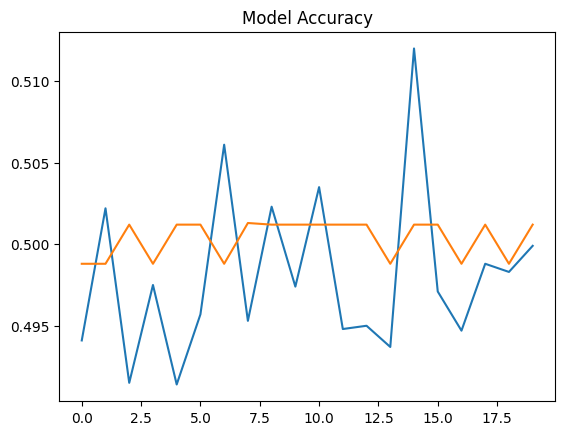

In [247]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")





In [250]:
#save
model.save("chatbot_modelDS")

INFO:tensorflow:Assets written to: chatbot_modelDS\assets


INFO:tensorflow:Assets written to: chatbot_modelDS\assets


In [251]:
#evaluate the test set
model.load_weights("chatbot_modelDS")

In [253]:
pred_results = model.predict(([inputs_test , queries_test]))

313/313 [==============================] - 2s 5ms/step


In [254]:
test_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [260]:
story = ' '.join(word for word in test_data[13][0])

In [261]:
story

'Sandra went back to the hallway . Sandra moved to the office . Mary moved to the hallway . Daniel journeyed to the garden . Mary journeyed to the office . Mary went back to the hallway . John grabbed the apple there . Mary moved to the garden .'

In [262]:
query = ' '.join(word for word in test_data[13][1])

In [263]:
query

'Is Mary in the hallway ?'

In [264]:
test_data[13][2]

'no'

In [266]:
val_max = np.argmax(pred_results[13])

for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("Predicted Answer is" , k)
print("Probability of Certanity" , pred_results[13][val_max])

Predicted Answer is yes
Probability of Certanity 0.5042153
